In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "fitbit"

![](https://miro.medium.com/v2/resize:fit:1400/1*SjEGKrjDp7skk4URhzW5Nw.png) 

## <span style="color:sienna">About the Company
Bellabeat is a tech company that focuses on health & wellbeing apparatuses. The company ws founded in 2013 and has been rapidly growing. They collect data for users ranging from activity, stress and reproductive health to better inform women about their health and habits.

## <span style="color:sienna">Bellabeat's Time Watch
Time is a wellness watch designed to track user sleep, activity and stress. Data collected is displayed on the Bellabeat app for users.

## <span style="color:sienna">Business Task
To use publically available data to gain insights into how customers use non-Bellabeat devices. Based on these findings, provide recommendations for the Time watch.

## <span style="color:forestgreen">Phase 1: ASK
**Questions to guide the analysis:**
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?
**Stakeholders:**

**Primary**

•	Urška Sršen: Bellabeat's cofounder and Chief Creative Officer

•	Sando Mur: Mathematician and Bellabeat's cofounder; key member of the Bellabeat executive team

**Secondary:**

•	Bellabeat marketing analytics team: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat's marketing strategy.

### <span style="color:green">Phase 2: PREPARE</span>
**Information on data source:**

The data being used comes from a public source called Fitness Tracker Data. The data was collected through a survey via Amazon Mechanical Turk between 3/2016 to 5/2016. 30 people had consented to the use of their personal data being used for this survey. The data collected includes daily activity, calories, intensities, heart rate, steps and weight.

**Determining the Credibility of the data using R.O.C.C.C: 
Is the data Reliable, Original, Comprehensive, Current, and Cited?**

- **Reliable:** The data is not reliable because it has a small sample size. There are only 30 participants, this small group is not representative of the fitness population.

- **Original:** This is not the original data source. It is curated from Amazon Mechanical Murk, which is a 3rd party source. The documents' date and time can be changed when exported.

- **Comprehensive:** The data is partially comprehensive, although it meets most of the parameters for the Bellabeat products such as physical activity, sleep monitoring, heart rate, etc. It does not include specific demographic data about the participants such as their gender, age, and health.

- **Current-:** The data was original colelcted in 2016 so, 7 years ago. This deems the data to be outdated and has probably changed since 2016.

### <span style="color:green">Phase 3: PROCESS</span>

Installed libraries that will used for this analysis.

In [2]:
# Load libraries and packages
library(tidyverse)
library(ggplot2)
library(dplyr)
library(lubridate)

In [3]:
#Importing the data
activity = read.csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
sleep = read.csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')
weight = read.csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')

hourly_intensity <- read.csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv')
hourly_steps <- read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv', show_col_types = FALSE)


## <span style="color:forestgreen">Viewing imported data

In [4]:
head(activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [5]:
head(weight)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


In [6]:
head(sleep)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


In [7]:
head(hourly_intensity)

,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,20,0.333333
2,1503960366,4/12/2016 1:00:00 AM,8,0.133333
3,1503960366,4/12/2016 2:00:00 AM,7,0.116667
4,1503960366,4/12/2016 3:00:00 AM,0,0.000000
5,1503960366,4/12/2016 4:00:00 AM,0,0.000000
6,1503960366,4/12/2016 5:00:00 AM,0,0.000000


In [8]:
head(hourly_steps)

Id,ActivityHour,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0


## <span style="color:forestgreen">Cleaning data

In [9]:
# Checking for duplicates:
print('data duplicates')
sum(duplicated(activity))
sum(duplicated(sleep))
sum(duplicated(weight))
sum(duplicated(hourly_intensity))
sum(duplicated(hourly_steps))

[1] "data duplicates"


[1] 0

[1] 3

[1] 0

[1] 0

[1] 0

In [10]:
# Checking for nulls:
print('data nulls')
sum(is.na(activity))
sum(is.na(sleep))
sum(is.na(weight))
sum(is.na(hourly_intensity))
sum(is.na(hourly_steps))

[1] "data nulls"


[1] 0

[1] 0

[1] 65

[1] 0

[1] 0

The weight table contains a lot of nulls, but they're only in the Fat column which won't be used in the analysis.

In [11]:
# Remove duplicate data:
sleep <- sleep %>%
    distinct()
sum(duplicated(sleep))

[1] 0

## <span style="color:forestgreen">Phase 4: ANALYZING

In [12]:
# Need to change date from chr to date type
# Make a new, cleaned df (c_) to ensure changes made aren't done to original df 
# as.POSIXct is similar to as.Date but has time as well (need to specify format in both: "%m/%d/%Y [%I:%M:%S %p]")
# Standardise Date names to allow merging later 
# %I is 12hr clock (1-12), %M is minutes (0-59), %S is secs (0-59), %p is AM or PM
# Also separate Day and Month for later analysis

# activity 
c_activity <- activity %>% 
    rename(Date = ActivityDate) %>% 
    mutate(
        Date = as.Date(Date, format = '%m/%d/%Y'), 
        Day = weekdays(Date),
        Month = months(Date)) 

# sleep 
c_sleep <- sleep %>%
rename(Date = SleepDay) %>% 
    mutate(
    Date = as.POSIXct(Date, format = '%m/%d/%Y %I:%M:%S %p'), 

        Time = format(Date, format = '%H:%M:%S'),
        Day = weekdays(Date),
        Month = months(Date)
          ) 
# weight 
c_weight <- weight %>%
    mutate(
        Date = as.POSIXct(Date, format = '%m/%d/%Y %I:%M:%S %p'),
        Time = format(Date, format = '%H:%M:%S'), 
        Day = weekdays(Date),
        Month = months(Date)
        )
# hourly_intensity
c_hourly_intensity <- hourly_intensity %>%
    mutate(
        Date = as.POSIXct(ActivityHour, format = '%m/%d/%Y %I:%M:%S %p'),  
        Time = format(Date, format = '%H:%M:%S'),
        Day = weekdays(Date),
        Month = months(Date)
        )

#hourly_steps 
c_hourly_steps <- hourly_steps %>%
    rename(Date = ActivityHour) %>%
    mutate(
        Date = as.POSIXct(Date, format = '%m/%d/%Y %I:%M:%S %p'),
        Time = format(Date, format = '%H:%M:%S'),
        Day = weekdays(Date),
        Month = months(Date)
        )
        

## <span style="color:forestgreen">Data exploration

In [13]:
n_distinct(c_activity$Id)
n_distinct(c_hourly_intensity$Id)
n_distinct(c_hourly_steps$Id)
n_distinct(c_sleep$Id)
n_distinct(c_weight$Id)

[1] 33

[1] 33

[1] 33

[1] 24

[1] 8

In the daily_activity dataset there were 33 participants vs the 30 the dataset had stated. In the sleep_day dataset there were 24 participants. In the weight dataset there were 8 participants.

In [14]:
print('activity summary (33n)')
c_activity %>%
    select(SedentaryMinutes, LightlyActiveMinutes, 
           FairlyActiveMinutes, VeryActiveMinutes, 
           Calories, TotalSteps) %>%
    summary() 
print('')

print('sleep summary (24n)')
c_sleep %>%
    select(TotalMinutesAsleep, TotalTimeInBed) %>%
    summary()
print('')

print('weight summary (8n)')
    c_weight %>%
    select(WeightKg, BMI) %>%
    summary()

[1] "activity summary (33n)"


 SedentaryMinutes LightlyActiveMinutes FairlyActiveMinutes VeryActiveMinutes
 Min.   :   0.0   Min.   :  0.0        Min.   :  0.00      Min.   :  0.00   
 1st Qu.: 729.8   1st Qu.:127.0        1st Qu.:  0.00      1st Qu.:  0.00   
 Median :1057.5   Median :199.0        Median :  6.00      Median :  4.00   
 Mean   : 991.2   Mean   :192.8        Mean   : 13.56      Mean   : 21.16   
 3rd Qu.:1229.5   3rd Qu.:264.0        3rd Qu.: 19.00      3rd Qu.: 32.00   
 Max.   :1440.0   Max.   :518.0        Max.   :143.00      Max.   :210.00   
    Calories      TotalSteps   
 Min.   :   0   Min.   :    0  
 1st Qu.:1828   1st Qu.: 3790  
 Median :2134   Median : 7406  
 Mean   :2304   Mean   : 7638  
 3rd Qu.:2793   3rd Qu.:10727  
 Max.   :4900   Max.   :36019  

[1] ""
[1] "sleep summary (24n)"


 TotalMinutesAsleep TotalTimeInBed 
 Min.   : 58.0      Min.   : 61.0  
 1st Qu.:361.0      1st Qu.:403.8  
 Median :432.5      Median :463.0  
 Mean   :419.2      Mean   :458.5  
 3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :796.0      Max.   :961.0  

[1] ""
[1] "weight summary (8n)"


    WeightKg           BMI       
 Min.   : 52.60   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:23.96  
 Median : 62.50   Median :24.39  
 Mean   : 72.04   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:25.56  
 Max.   :133.50   Max.   :47.54  

On average, most users spend their time in a sedentary state accounting for 991.2 mins, 16.52 hrs. 
- So, as intensity increases, time in sedentary state decreases.
Also, most users spend approximately 419.2 minutes (~7 hours) asleep. Research shows that it is recommended for adults to get about 7 to 9 hours of sleep.
- So, the company can look to improve sleep quality.
The average BMI is 25.19. The average user is considered slightly overweight because the range is within 25 to 29.9.

## <span style="color:forestgreen">Joining dataframes
  

In [15]:
# Inner join that uses Id and Date - only returns matching records 
trimmed_sleep <- c_sleep %>% select(Id, Date, TotalMinutesAsleep, TotalTimeInBed)
trimmed_weight <- c_weight %>% select(Id, Date, WeightKg, BMI)

# Daily measured df:
activity_sleep <- merge(c_activity, trimmed_sleep, by = c('Id', 'Date'))
activity_weight <- merge(c_activity, trimmed_weight, by = c('Id', 'Date'))

# Hourly measured df:
activity_intensity <- merge(c_activity, c_hourly_intensity, by = c('Id', 'Date', 'Day', 'Month'))
hourly_int_steps <- merge(c_hourly_intensity, c_hourly_steps, by = c('Id', 'Date', 'Day', 'Month', 'Time'))
                                                    
n_distinct(c_sleep$Id)
n_distinct(activity_sleep$Id)

n_distinct(c_weight$Id)
n_distinct(activity_weight$Id)

n_distinct(c_activity$Id)
n_distinct(activity_intensity$Id)
n_distinct(hourly_int_steps$Id)

[1] 24

[1] 24

[1] 8

[1] 8

[1] 33

[1] 33

[1] 33

## <span style="color:forestgreen">Phase 5: Share
## <span style="color:forestgreen">Visualizations


<span style="color:purple">**Relationship between Total Steps and Calories**

`geom_smooth()` using formula = 'y ~ x'


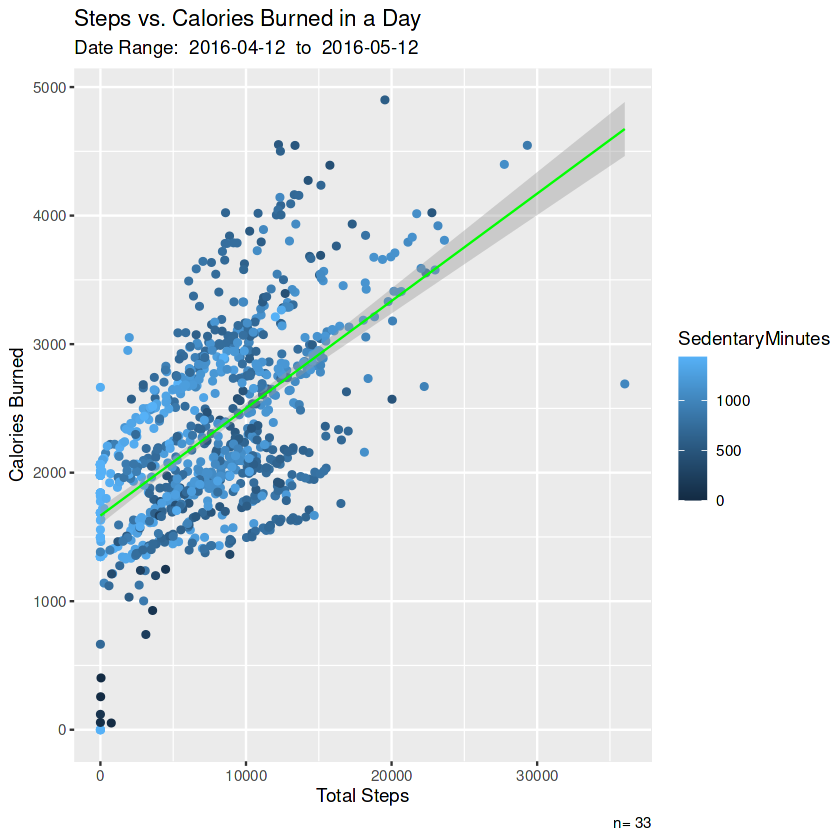

In [16]:
max_date = max(c_activity$Date)
min_date = min(c_activity$Date)
sample_size = n_distinct(c_activity$Id)

ggplot(data=c_activity) +
    geom_jitter(mapping=aes(x=TotalSteps,
                          y=Calories, colour=SedentaryMinutes)) +
    labs(title='Steps vs. Calories Burned in a Day',
         subtitle=paste("Date Range: ", min_date, " to ", max_date),
        caption=paste('n=',sample_size),
        x='Total Steps',
        y='Calories Burned') +
    geom_smooth(mapping=aes(x=TotalSteps,
                       y=Calories),
               color = 'Green',
               linewidth = 0.5,
                method = 'lm') 

- According to the viz, during the day users spend a lot of of time in a sedentary state.
- It also shows the more steps a user takes the more caloris are burned. This is a positive correlation between the two.

<span style="color:purple">**Relationship between Total Steps and Sedentary minutes**

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


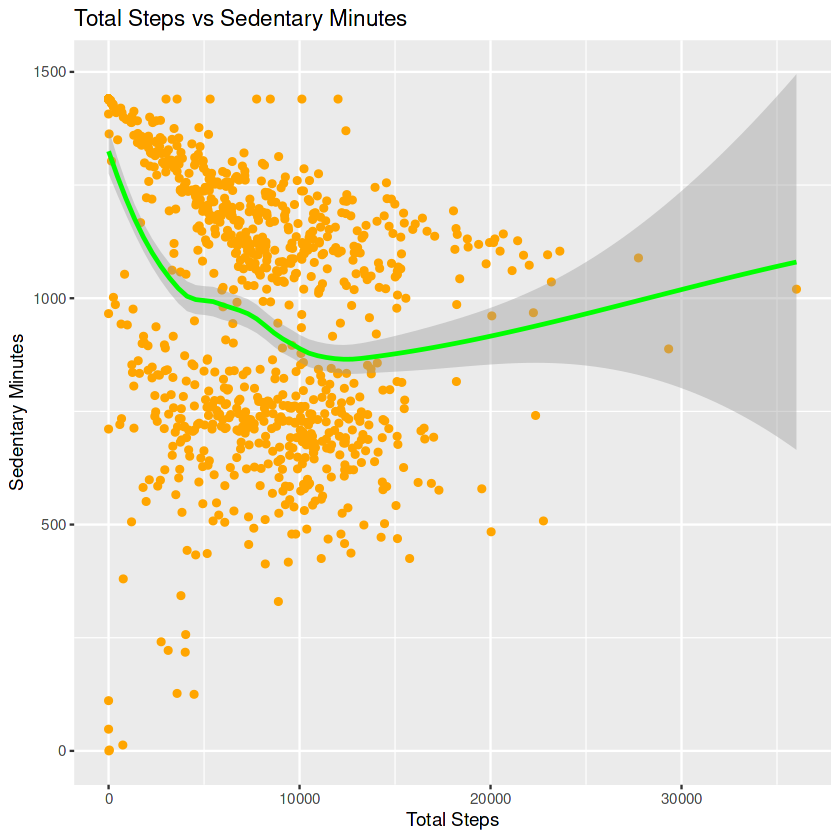

In [17]:
ggplot(data=c_activity, 
       mapping = aes(x = TotalSteps, y = SedentaryMinutes) ) + 
  geom_point(color = "orange") +
  geom_smooth(color = "Green") +
  labs(title = "Total Steps vs Sedentary Minutes",
       x = "Total Steps", y = "Sedentary Minutes")

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


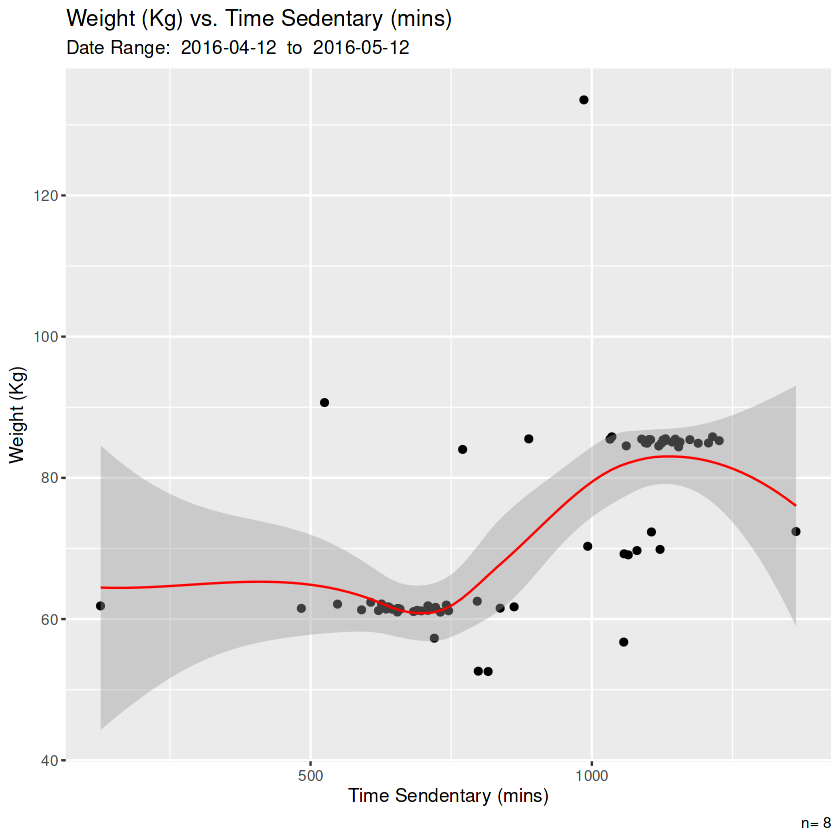

In [18]:
#Does sedentary impact user weight?
max_date = max(activity_weight$Date)
min_date = min(activity_weight$Date)
sample_size = n_distinct(activity_weight$Id)

ggplot(data=activity_weight) +
    geom_jitter(mapping=aes(x=SedentaryMinutes,
               y=WeightKg)) +
    geom_smooth(mapping=aes(x=SedentaryMinutes,
               y=WeightKg), colour='Red', linewidth=0.5) +
    labs(title = 'Weight (Kg) vs. Time Sedentary (mins)',
        subtitle = paste("Date Range: ", min_date, " to ", max_date),
        caption = paste('n=',sample_size),
        x='Time Sendentary (mins)',
        y='Weight (Kg)')

- The viz suggests that the more time the user spends sedentary the greater the weight. 
- The same size is 8, so there isn't much variance. Also includes an outlier

<span style="color:purple">**How active are users on a daily basis?**

Day,mean_sedentary_mins,mean_light_mins,mean_fair_mins,mean_active_mins,min_date,max_date,sample_size
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<date>,<int>
Monday,1027.9417,192.0583,14.00000,23.10833,2016-04-18,2016-05-09,32
Tuesday,1007.3618,197.3421,14.33553,22.95395,2016-04-12,2016-05-10,33
Wednesday,989.4800,189.8533,13.10000,20.78000,2016-04-13,2016-05-11,33
Thursday,961.9932,185.4218,11.95918,19.40816,2016-04-14,2016-05-12,33
Friday,1000.3095,204.1984,12.11111,20.05556,2016-04-15,2016-05-06,33
Saturday,964.2823,207.1452,15.20161,21.91935,2016-04-16,2016-05-07,32
Sunday,990.2562,173.9752,14.52893,19.98347,2016-04-17,2016-05-08,32


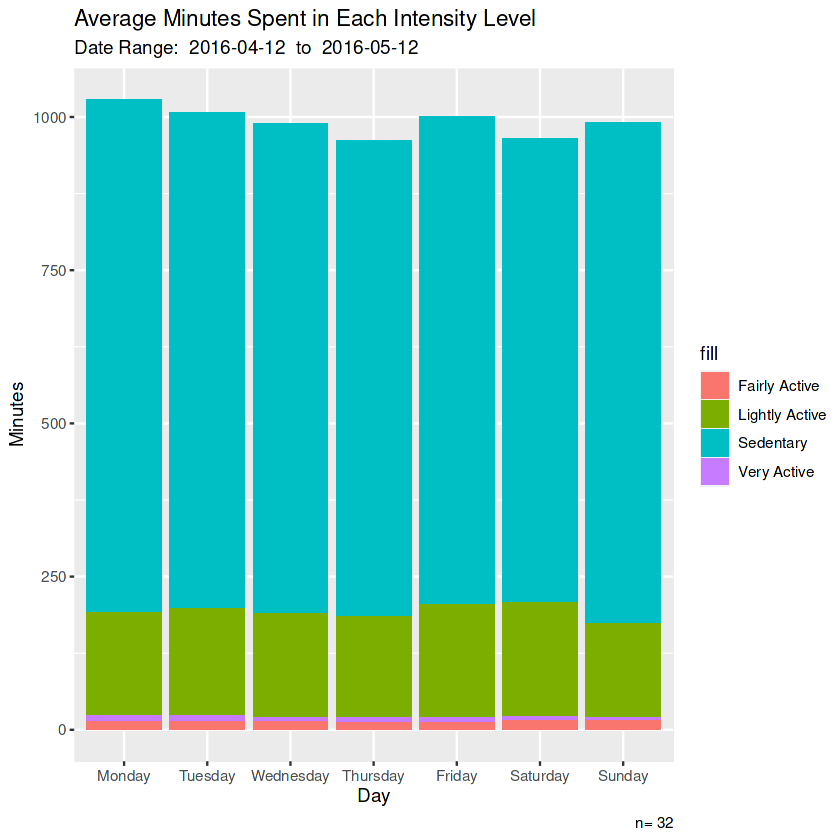

In [19]:
# Examine the average minutes spent per day for each level of activeness
day_order <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")

grouped_day_intensity <- c_activity %>%
  mutate(Day = factor(weekdays(Date), levels = day_order)) %>% 
  group_by(Day) %>%
  summarise(mean_sedentary_mins = mean(SedentaryMinutes),
            mean_light_mins = mean(LightlyActiveMinutes),
            mean_fair_mins = mean(FairlyActiveMinutes),
            mean_active_mins = mean(VeryActiveMinutes),
            min_date = min(Date),
            max_date = max(Date),
            sample_size = n_distinct(Id)) %>%
  View()
ggplot(data = grouped_day_intensity) +
  geom_bar(mapping = aes(x = Day, y = mean_sedentary_mins, fill = 'Sedentary'), stat = 'identity', position = 'dodge') +
  geom_bar(mapping = aes(x = Day, y = mean_light_mins, fill = 'Lightly Active'), stat = 'identity', position = 'dodge') +
  geom_bar(mapping = aes(x = Day, y = mean_active_mins , fill = 'Very Active'), stat = 'identity', position = 'dodge') +
  geom_bar(mapping = aes(x = Day, y = mean_fair_mins , fill = 'Fairly Active'), stat = 'identity', position = 'dodge') +
  labs(title = 'Average Minutes Spent in Each Intensity Level',
       y = 'Minutes',
       subtitle = paste("Date Range: ", min(grouped_day_intensity$min_date), " to ", max(grouped_day_intensity$max_date)),
       caption = paste('n=', grouped_day_intensity$sample_size))

Throughout the week, most time is spent sedentary. But, on Sundays the least amount of light activity is done on those days.
- May be possible that users recognize Sunday as a "rest day."
Possible that users can be encouraged to engage in lightly active exercises than intense or very active ones.

<span style="color:purple">**On which days do users spend the most and least amount of time engaging in intense activities?**

In [20]:
# Reorder the Days
day_order <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")

grouped_day_intensity <- activity_intensity %>%
    mutate(Day = factor(Day, levels = day_order)) %>% # factor day before running summarise so you only have 1 row each day
    group_by(Day) %>%
    drop_na() %>%
    summarise(mean_steps = mean(TotalSteps),
              sample_size=n_distinct(Id), 
              mean_total_int = mean(TotalIntensity)*24,
# since Total Intensity is by hour and not by day, y-axis won't be accurate, best thing I could come up with is multiplying by 24 (24hrs in a day)
              min_date = min(Date), 
              max_date = max(Date)) %>%
View()

Day,mean_steps,sample_size,mean_total_int,min_date,max_date
<fct>,<dbl>,<int>,<dbl>,<date>,<date>
Monday,7798.404,32,290.6928,2016-04-18,2016-05-09
Tuesday,8233.340,33,298.6267,2016-04-12,2016-05-10
Wednesday,7633.415,33,282.2081,2016-04-13,2016-05-11
Thursday,7754.363,33,286.2455,2016-04-14,2016-05-12
Friday,7502.356,33,290.2342,2016-04-15,2016-05-06
Saturday,8314.140,32,309.6206,2016-04-16,2016-05-07
Sunday,6943.884,32,263.6105,2016-04-17,2016-05-08


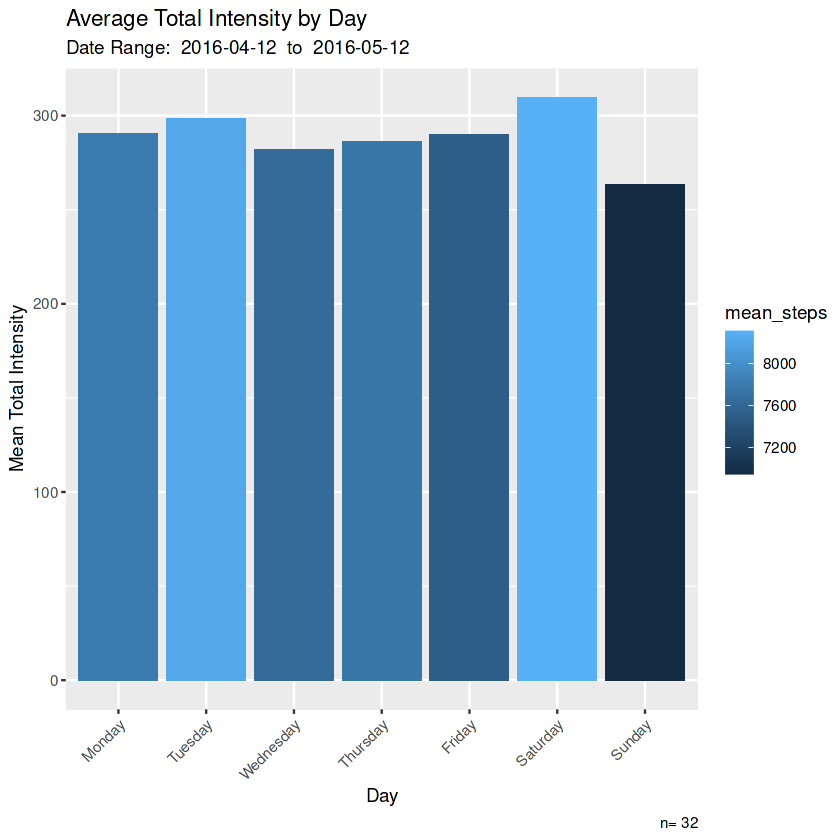

In [21]:
ggplot(data = grouped_day_intensity) + 
  geom_bar(aes(x = Day, y = mean_total_int, fill = mean_steps), stat = "identity") + 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
  labs(title="Average Total Intensity by Day", x = "Day", y = "Mean Total Intensity",
       subtitle=paste("Date Range: ", min_date, " to ", max_date), caption=paste('n=',grouped_day_intensity$sample_size))

The viz shows on Saturdays and Tuesdays users are the most active. And the least active on Sundays.
- Would need to encourage users to spend more time engaging in lightly intense exercises on Sundays.

<span style="color:purple">**Examine time frequencies**

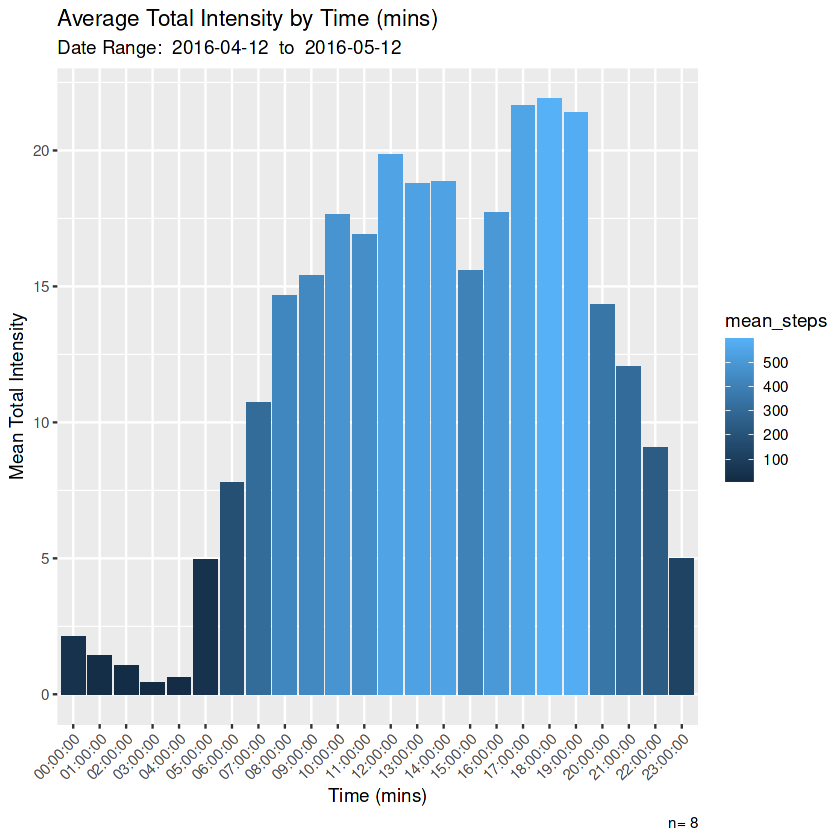

In [22]:
#Hourly data frame
grouped_time_intensity <- hourly_int_steps %>%
  drop_na() %>%
  group_by(Time) %>%
  summarise(mean_total_int = mean(TotalIntensity),
            mean_steps = mean(StepTotal),
            sample_size = n_distinct(Id),
            min_date = min(Date),
            max_date = max(Date)) 
ggplot(data = grouped_time_intensity) + 
  geom_bar(aes(x = Time, y = mean_total_int, fill = mean_steps), stat = "identity") + 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  labs(title = "Average Total Intensity by Time (mins)", 
       x = "Time (mins)", y = "Mean Total Intensity",
       subtitle = paste('Date Range: ',min_date, ' to ', max_date),
       caption = paste('n=', sample_size))

Users spend the most time exercising between 5 AM and 11 PM. The length of workouts depend on each user preference. 
- The company should consider the watch notifying the user of workout reminders. 
The notification system should track the user heart rate. This would be the indicator that the user has begun to exercise.
So, based on this information the user would be sent workout reminders.

<span style="color:purple">**Examine if there is a relationship between Time Asleep and Sedentary Minutes**

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


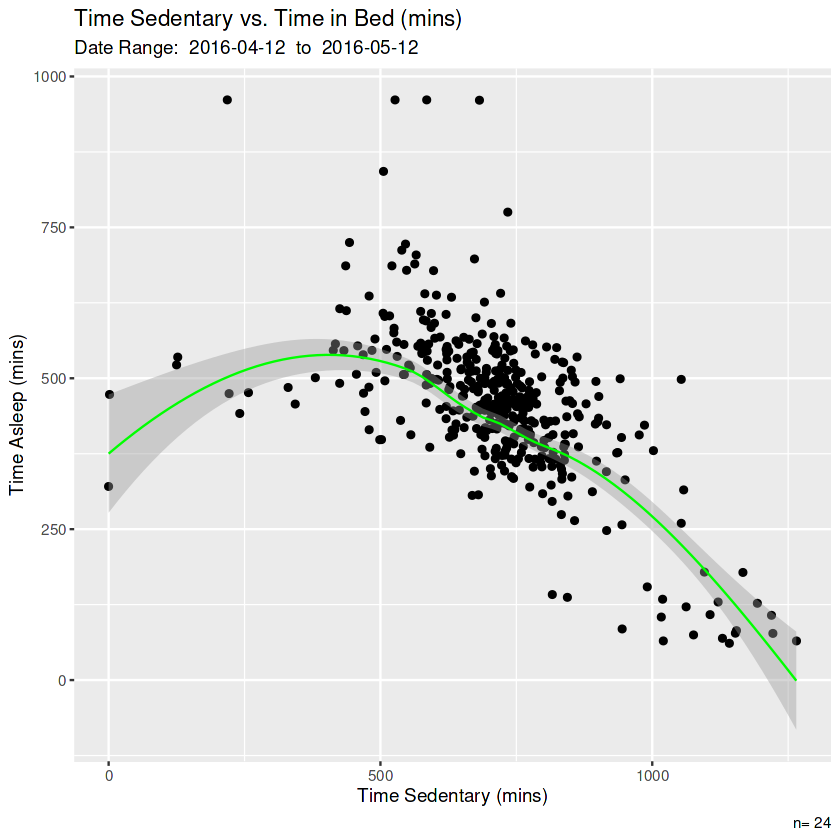

In [23]:
max_date = max(activity_sleep$Date)
min_date = min(activity_sleep$Date)
sample_size = n_distinct(activity_sleep$Id)

ggplot(data=activity_sleep) +
    geom_jitter(mapping=aes(x=SedentaryMinutes,
                          y=TotalTimeInBed)) +
    labs(title=paste('Time Sedentary vs. Time in Bed (mins)'),
         subtitle=paste("Date Range: ", min_date, " to ", max_date),
        caption=paste('n=',sample_size),
        x='Time Sedentary (mins)',
        y='Time Asleep (mins)') +
    geom_smooth(mapping=aes(x=SedentaryMinutes,
                       y=TotalMinutesAsleep),
               color = 'Green',
               linewidth = 0.5)

Emphasizes the importance of sleep or bedtime reminders, especially if the user is sedentary.
It is possible that sedentary users are actively using their cell phones instead of being asleep.
- This would require more data to investigate.
- The watch would have to be connected to the users cell phone to be privy to the users screentime data.

<span style="color:purple">**Examine if there is a relationship between total minutes asleep and total time in bed**

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


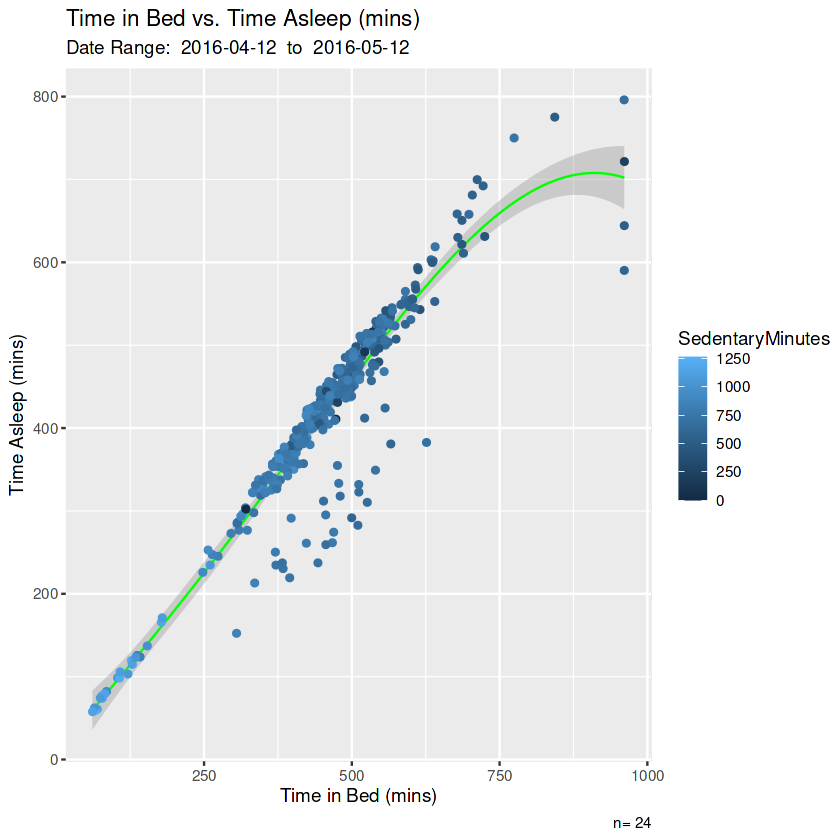

In [24]:
# Data says all the users fall asleep at MIDNIGHT. 
max_date = max(activity_sleep$Date)
min_date = min(activity_sleep$Date)
sample_size = n_distinct(activity_sleep$Id)

# We'll use our merged df to add SedentaryMinutes as a colour
ggplot(data=activity_sleep) +
    geom_smooth(mapping=aes(x=TotalTimeInBed,
                            y=TotalMinutesAsleep),
    color='Green',
    linewidth=0.5) +
labs(title='Time in Bed vs. Time Asleep (mins)',
    subtitle=paste("Date Range: ", min_date, " to ", max_date),
        caption=paste('n=',sample_size),
    x='Time in Bed (mins)',
    y='Time Asleep (mins)') +
geom_jitter(mapping=aes(x=TotalTimeInBed,
                            y=TotalMinutesAsleep,colour=SedentaryMinutes))

There is a correlation between time in bed and total amount of sleep. To obtain more sleep users would have to set reminders to go to bed earlier.
- The average amound of sleep for all users is 419.2 mins so, approximately 420 minutes. The vizualization is representative of this.

## <span style="color:forestgreen"> Phase 6: ACT
    
<span style="color:purple">**Answering Business questions:**

**1. What are some trends in smart device usage?**
    
The users are not wearing the watch whilst they are sleep. This is noted in minimal data on their sleep patterns. They are also not recording their weights and tracking calories burnt throughout the day. It can be concluded that the participants are not using all the applications that the watch provides.

**2. How could these trands apply to Bellabeat customers?**
    
There are a lot of other devices on the market that provide the same application features as Bellabeat. It is possible that user already have these products and are not interested in using the same applications on another device.
 
**3. How could these trends help influence Bellabeat marketing strategy?**

These trends can provide Bellabeat with information to improve their application features where other device with similar applications are lacking. They can also provide new features that allow them to draw in more users and increase application usage. This would put them ahead of competitiors.
    
<span style="color:purple">**Recommendations:**
- A notification system, either user-defined or AI-driven (capable of learning user routines), could offer a range of features, including reminders to go to bed, prompts to stand up and take breaks during work, and notifications for users who haven't completed their daily physical activity.
- To engage and motivate more users to exercise, Bellabeat could create weekly and monthly challenges. These challenges would allow users to select the type of activity and its difficulty level, thereby encouraging them to actively participate in physical activities.
- To enhance user support and wellness within the app, Bellabeat could introduce mindfulness features that utilize data from their devices to calculate individual stress levels and heart rate. The app could then send notifications prompting users to engage in breathing exercises.


    
 
    
   